Профессия Data Science  
Блок 4. Введение в машинное обучение  
**ML-7. Оптимизация гиперпараметров модели**

---

## **✍ Оглавление:**

1. Введение
2. Базовая оптимизация

---

## **1. Введение**

в машинном обучении есть два типа параметров.

**Внутренние (параметры модели)**

Подбираются во время обучения и определяют, как использовать входные данные для получения необходимого результата.

Например, это веса (коэффициенты уравнения) в линейной/логистической регрессии.

**Внешние (параметры алгоритма)**

Их принято называть гиперпараметрами. Внешние параметры могут быть произвольно установлены перед началом обучения и контролируют внутреннюю работу обучающего алгоритма.

Например, это параметр регуляризации в линейной/логистической регрессии.

**Гиперпараметры** отвечают за сложность взаимосвязи между входными признаками и целевой переменной, поэтому сильно влияют на модель и качество прогнозирования.

Тщательный подбор гиперпараметров гарантирует, что модель покажет максимально возможную точность на обучающих данных, но это совершенно не означает хороший результат на тестовых или новых данных.

Поиск оптимальных значений гиперпараметров модели является сложной задачей, обязательной почти для всех моделей и наборов данных. Однако важно понимать смысл гиперпараметров перед их подбором.

## **2. Базовая оптимизация**

В базовой оптимизации, предоставляемой библиотекой sklearn, есть два основных метода — grid search и random search.

Наиболее часто используемый метод — это **поиск по сетке (grid search)**, который по сути является попыткой перебрать все возможные комбинации заданных гиперпараметров. Мы указываем список значений для различных гиперпараметров, и, ориентируясь на нашу метрику, оцениваем эффективность модели для каждого их сочетания, чтобы получить оптимальную комбинацию значений.

Допустим, мы хотим подобрать гиперпараметры min_samples_leaf и max_depth для алгоритма DecisionTreeClassifier. Зададим списки их значений:

min_samples_leaf = [3, 5, 8, 9]
max_depth = [4, 5, 6, 7, 8]
 

Поскольку нам нужно перебрать четыре различных значения для min_samples_leaf и пять — для max_depth, то получается всего 4*5=20 комбинаций. Модель будет обучена 20 раз; столько же раз будет рассчитана метрика.

**<center> Опасность переобучения и утечки данных </center>**

Для того, чтобы выбрать оптимальные значения гиперпараметров, мы ориентируемся на выбранную метрику, рассчитанную на тестовой выборке. 

Давайте вспомним: мы перебираем множество значений гиперпараметров и выбираем ту комбинацию значений, которая даёт наилучшую точность на тестовых данных. Однако это совсем не означает, что на новых данных мы получим такой же результат. 

Поскольку мы использовали тестовый набор для настройки гиперпараметров, мы больше не можем использовать его для оценки качества модели. Теперь в этих целях нам необходим независимый набор данных, то есть набор, который не использовался для построения модели и настройки её гиперпараметров.

Следовательно, надо разбить данные на три части: обучающую для построения модели, проверочную (валидационную) для выбора гиперпараметров модели, а также тестовую для оценки качества модели и выбранных гиперпараметров. 

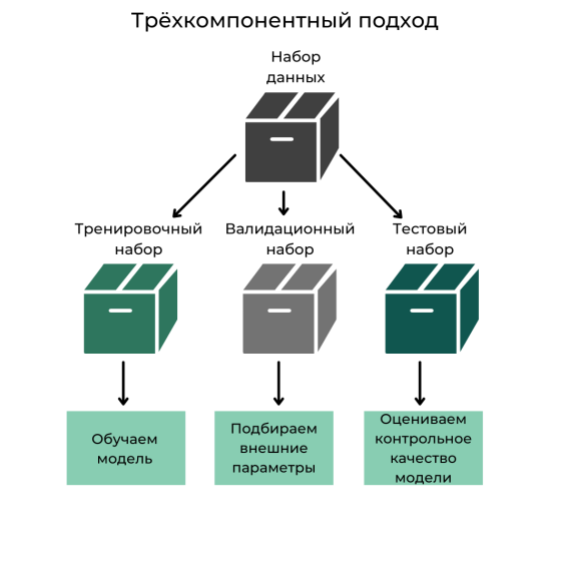

Для лучшей оценки обобщающей способности вместо одного разбиения данных на обучающий и проверочный наборы мы можем воспользоваться перекрёстной проверкой, то есть **кросс-валидацией (cross validation)**. В таком случае качество модели оценивается для каждой комбинации гиперпараметров по всем разбиениям кросс-валидации. 

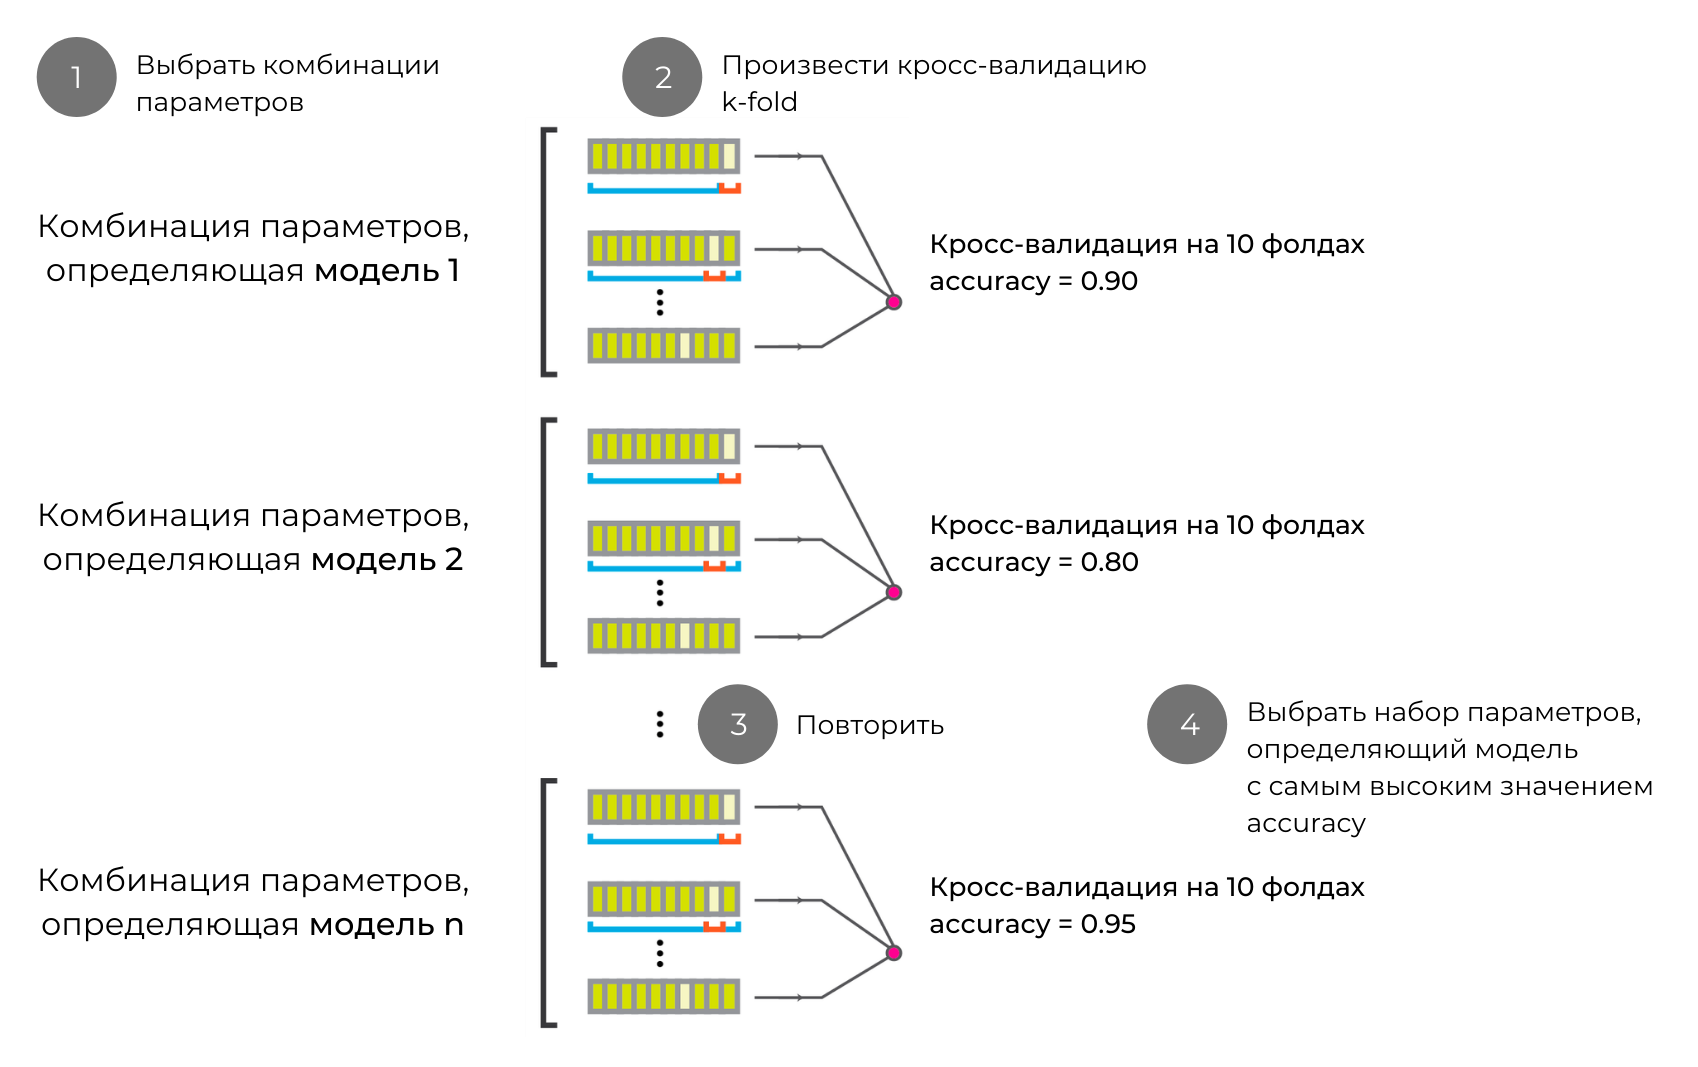

Пояснение к рисунку. Предположим, что у нас есть n комбинаций гиперпараметров. Берём первую комбинацию и обучаем на них первую модель с помощью кросс-валидации с 10 фолдами (cv=10), затем рассчитываем метрику как среднее по всем разбиениям. Так проделываем для каждой комбинации и выбираем ту, при которой наша метрика наилучшая. В итоге мы обучим n*cv моделей, но выберем один набор гиперпараметров, который и будет использоваться для обучения итоговой модели на всей обучающей выборке.

